In [237]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [131]:
# Reading training datasets
alternative = pd.read_csv("alternative.csv")
anime = pd.read_csv("anime.csv")
blues = pd.read_csv("blues.csv")
classical = pd.read_csv("classical.csv")
country = pd.read_csv("country.csv")
electronic = pd.read_csv("electronic.csv")
hiphop = pd.read_csv("hip-hop.csv")
jazz = pd.read_csv("jazz.csv")
rap = pd.read_csv("rap.csv")
rock = pd.read_csv("rock.csv")
datasets = \
    [alternative, anime, blues, classical, country, electronic, hiphop, jazz, rap, rock]
datasets_name = ["alternative", "anime", "blues", "classical", "country", "electronic",
                 "hiphop", "jazz", "rap", "rock"]

['alternative', 'anime', 'blues', 'classical', 'country', 'electronic', 'hiphop', 'jazz', 'rap', 'rock']


In [190]:
# information of alternative dataset
alternative.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       5000 non-null   int64  
 1   artist_name       5000 non-null   object 
 2   track_hash        5000 non-null   object 
 3   track_name        5000 non-null   object 
 4   popularity        5000 non-null   int64  
 5   acousticness      5000 non-null   float64
 6   danceability      5000 non-null   float64
 7   duration_ms       5000 non-null   int64  
 8   energy            5000 non-null   float64
 9   instrumentalness  5000 non-null   float64
 10  key               5000 non-null   object 
 11  liveness          5000 non-null   float64
 12  loudness          5000 non-null   float64
 13  mode              5000 non-null   object 
 14  speechiness       5000 non-null   float64
 15  tempo             5000 non-null   object 
 16  obtained_date     5000 non-null   object 


In [185]:
# function of finding high correlation variables
def find_high_correlation(dataset):
    corr = dataset.corr()
    # Convert lower triangle of value of correlation matrix to NaN
    corr = \
    corr.mask(np.tril(np.ones(corr.shape)).astype(np.bool))
    # keep correlation absolute values that are less than 1 and greater than 1
    mask = corr.abs().lt(1) & corr.abs().gt(0.5)
    return corr.where(mask).stack()

In [209]:
# function of plotting heatmap
def plot_heatmap(dataset):
    dataset.corr()
    return sns.heatmap(dataset.corr(), cmap='Blues', annot = True)

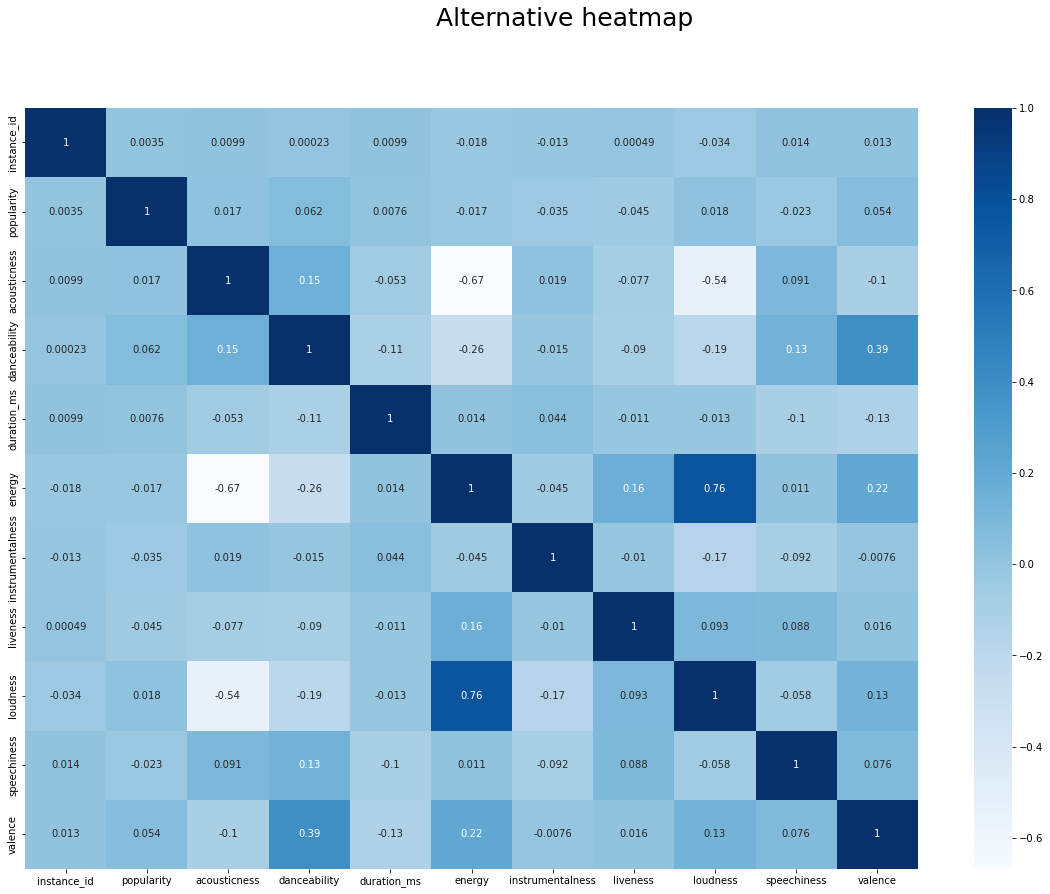

High correlation between variables
                               0
acousticness energy   -0.667703
             loudness -0.540520
energy       loudness  0.762536


In [245]:
# correlation heatmap of alternative dataset
fig = plt.figure(figsize = (20,14))
fig.suptitle("Alternative heatmap", fontsize=25)
plot_heatmap(alternative)
plt.show()

# high correlation between variables
alternative_corr = pd.DataFrame(find_high_correlation(alternative))
print("High correlation between variables\n", alternative_corr)

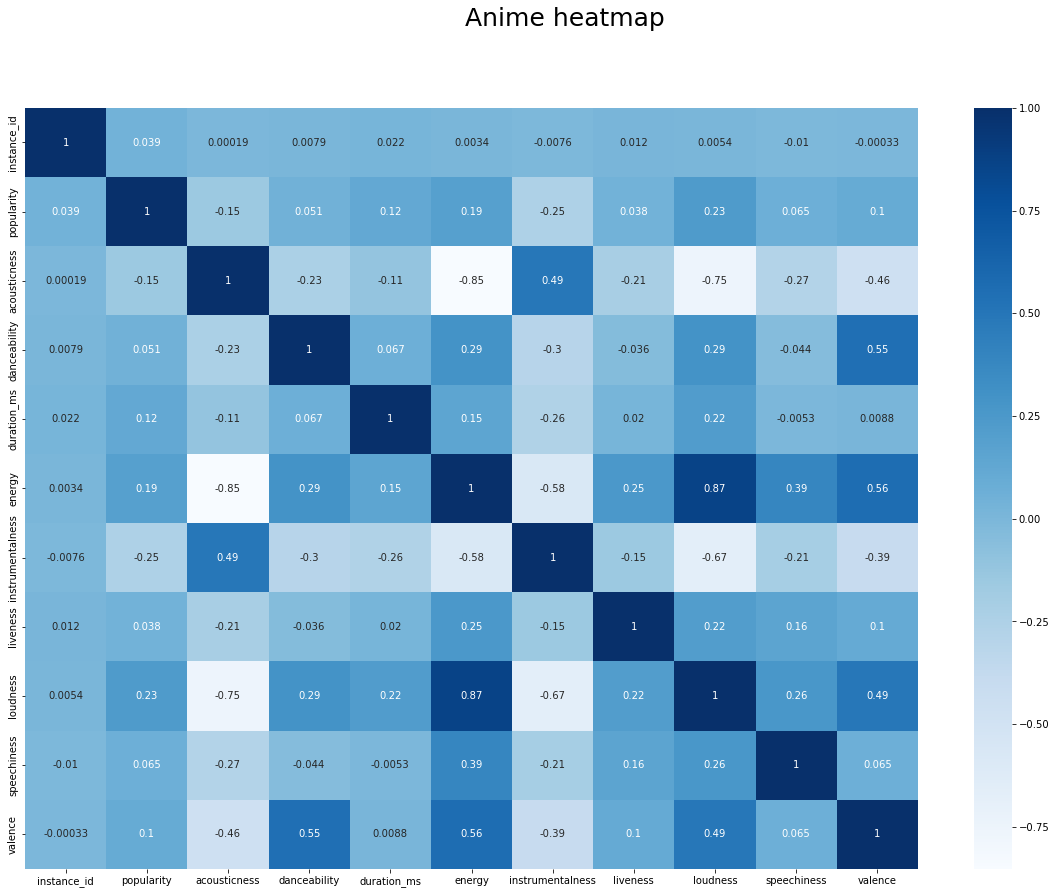

High correlation between variables
                                           0
acousticness     energy           -0.852307
                 loudness         -0.752029
danceability     valence           0.549178
energy           instrumentalness -0.575415
                 loudness          0.869077
                 valence           0.559697
instrumentalness loudness         -0.670713


In [246]:
# correlation heatmap of anime dataset
fig = plt.figure(figsize = (20,14))
fig.suptitle("Anime heatmap", fontsize=25)
plot_heatmap(anime)
plt.show()

# high correlation between variables
anime_corr = pd.DataFrame(find_high_correlation(anime))
print("High correlation between variables\n", anime_corr)